### Imports:

In [35]:
# libs
from numba import set_num_threads
# adjust this to your preference. at least one less than cpu cores is recommended,
# since numba code can't easily be interrupted and you might lock up your system if
# something goes wrong
set_num_threads(8)

import matplotlib.pyplot as plt
from numpy.random import rand
import numpy as np

%matplotlib widget
from IPython import display

from scipy.optimize import curve_fit

# code
import randomwalk
import energy
import randomwalk_statistics
import annealing
import interaction

### Constants:

In [30]:
# consts
LEN_PROTEINS = 30

NUM_AVGS_WALK = 10000
LEN_WALK = 100

NUM_AVGS_EVALUES = int(1e6)

NUM_MC_STEPS = int(2e3)
MC_TEMP = 1
MC_TEMP_HIGH = 10

NUM_T_STEPS_ANNEALING = int(1e2)
NUM_STEPS_AT_T_ANNEALING = int(1e4)
INIT_TEMP_ANNEALING = 10
FINAL_TEMP_ANNEALING = 1
RUNS_ANNEALING = 20

NUM_T_STEPS_EX6 = int(1e2)
NUM_STEPS_AT_T_EX6 = int(1e4)

# plotting
DPI = 600
FMT = 'png'

### Fit functions:

In [20]:
def power(x, a, b):
    return a*x**b

### Ex. 1:

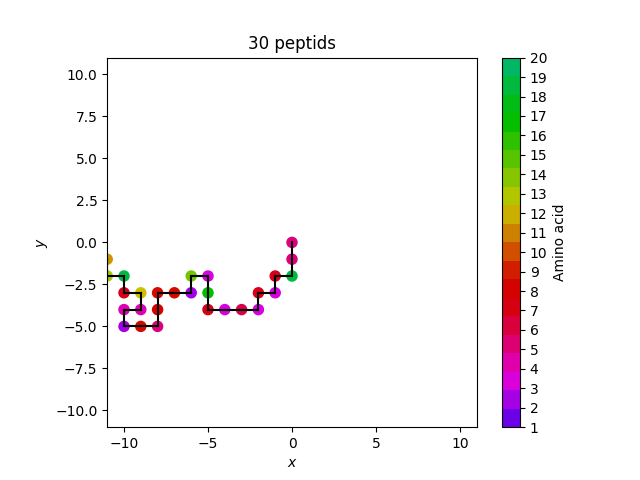

In [15]:
grid, coord_vec = randomwalk.self_avoiding_walk_protein(dim=LEN_PROTEINS, steps=LEN_PROTEINS)
while(coord_vec[-1].x == 0): # discard protein walks that got stuck
    grid, coord_vec = randomwalk.self_avoiding_walk_protein(dim=LEN_PROTEINS, steps=LEN_PROTEINS)
fig, ax = randomwalk.plot_protein(coord_vec, dim=LEN_PROTEINS/3, path="")
plt.savefig(f'figures/ex1.{FMT}', dpi = DPI, format = FMT)

### Ex. 2:

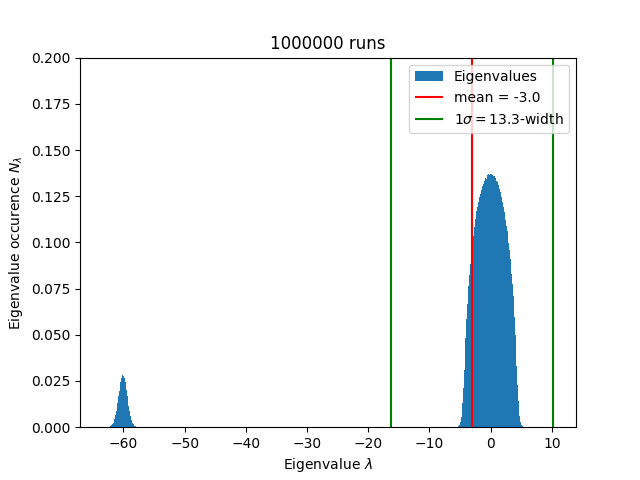

In [16]:
fig, ax, eigenvalues, ev_mean, ev_std = energy.eigenvalue_statistics(runs=NUM_AVGS_EVALUES, path="")
plt.savefig(f'figures/ex2.{FMT}', dpi = DPI, format = FMT)

### Ex. 3:

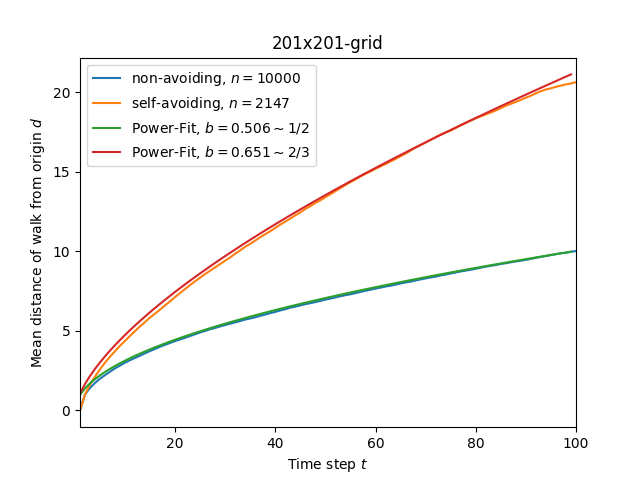

In [17]:
fig, ax, distance_r, distance_sa = randomwalk_statistics.mean_sq_pos_stats_both(NUM_AVGS_WALK, LEN_WALK, LEN_WALK, "")
step = np.asarray(range(LEN_WALK))
p, c = curve_fit(power, step, distance_r)
p2, c2 = curve_fit(power, step, distance_sa)
ax.plot(step, power(step, p[0], p[1]), label=f"Power-Fit, $b={np.round(p[1], 3)}\\sim 1/2$")
ax.plot(step, power(step, p2[0], p2[1]), label=f"Power-Fit, $b={np.round(p2[1],3)}\\sim 2/3$")
#ax.loglog()
ax.set_xlim([1, LEN_WALK])
ax.legend()
fig.savefig(f'figures/ex3.{FMT}', dpi = DPI, format = FMT)


Exponents reproduce analytical results. ^

### Ex. 4:

### Animation:

In [22]:
anim, fig, ax1, ax2, grids_vecs = energy.animated_monte_carlo(length=LEN_PROTEINS, mc_steps=1000, T=1, frame_interval=10, fps=8, path="")
vid = anim.to_html5_video()
html = display.HTML(vid)
display.display(html)
plt.close(fig)


MC done, saving gif. This may take a while.


### Plot T=1:

Barriers:
Energiebarrieren: [0.09859473]


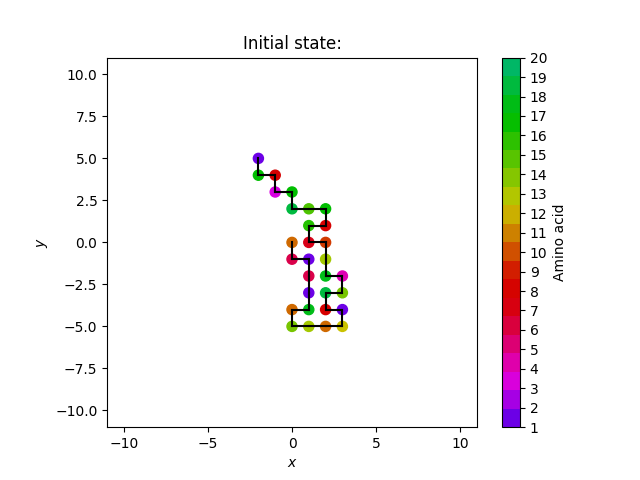

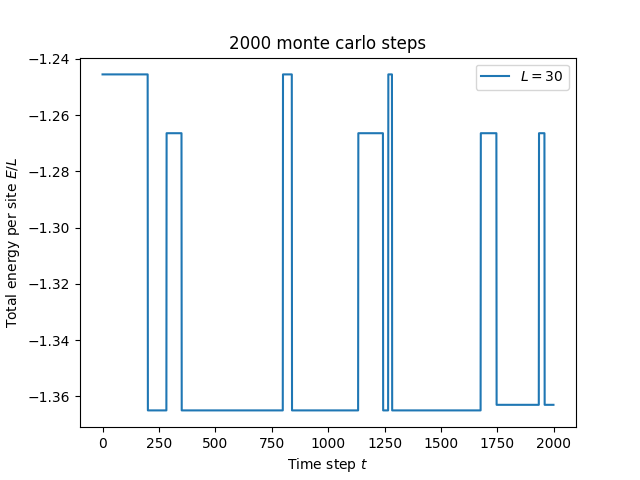

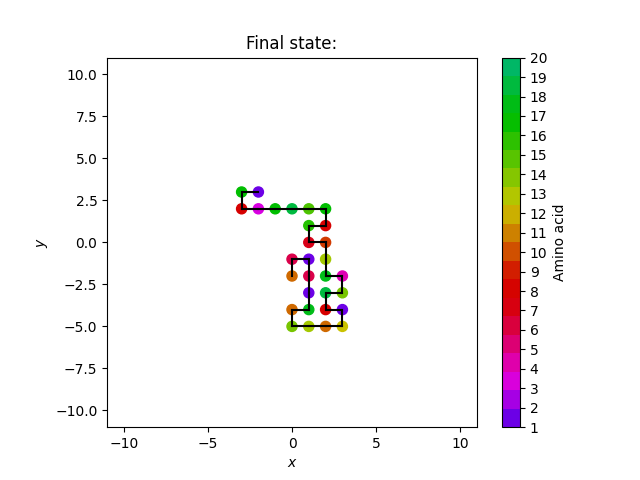

In [33]:
fig, ax, ergs, grid, coord_vec, figPrev, axPrev = energy.evolve_protein_plot_energy(length=LEN_PROTEINS, mc_steps=NUM_MC_STEPS, T=MC_TEMP, path="")
axPrev.set_title("Initial state:")
figPrev.savefig(f'figures/ex4_protein_prev.{FMT}', dpi = DPI, format = FMT)
fig.savefig(f'figures/ex4_erg.{FMT}', dpi = DPI, format = FMT)
fig2, ax2 = randomwalk.plot_protein(coord_vec=coord_vec, dim=LEN_PROTEINS/3, path="")
ax2.set_title("Final state:")
fig2.savefig(f'figures/ex4_protein.{FMT}', dpi = DPI, format = FMT)

### Plot T=10:

Barriers:
Energiebarrieren: [0.15045115 0.22414546]


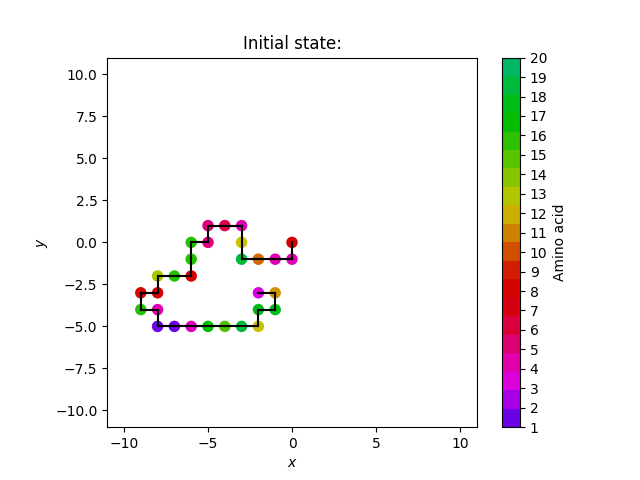

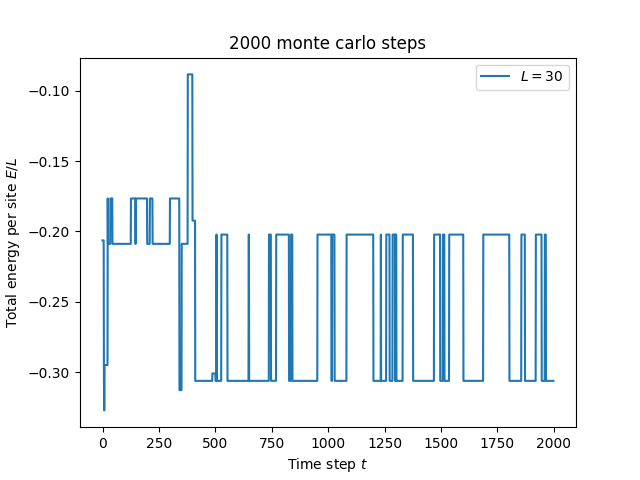

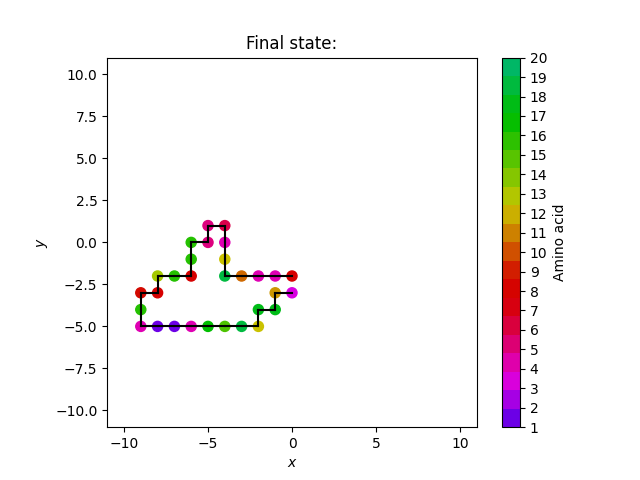

In [34]:
fig, ax, ergs, grid, coord_vec, figPrev, axPrev = energy.evolve_protein_plot_energy(length=LEN_PROTEINS, mc_steps=NUM_MC_STEPS, T=MC_TEMP_HIGH, path="")
axPrev.set_title("Initial state:")
figPrev.savefig(f'figures/ex4_protein_prev.{FMT}', dpi = DPI, format = FMT)
fig.savefig(f'figures/ex4_erg.{FMT}', dpi = DPI, format = FMT)
fig2, ax2 = randomwalk.plot_protein(coord_vec=coord_vec, dim=LEN_PROTEINS/3, path="")
ax2.set_title("Final state:")
fig2.savefig(f'figures/ex4_protein.{FMT}', dpi = DPI, format = FMT)

### Ex. 5:

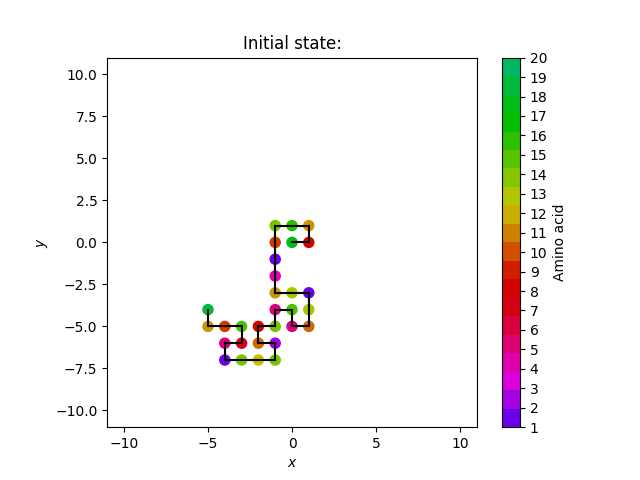

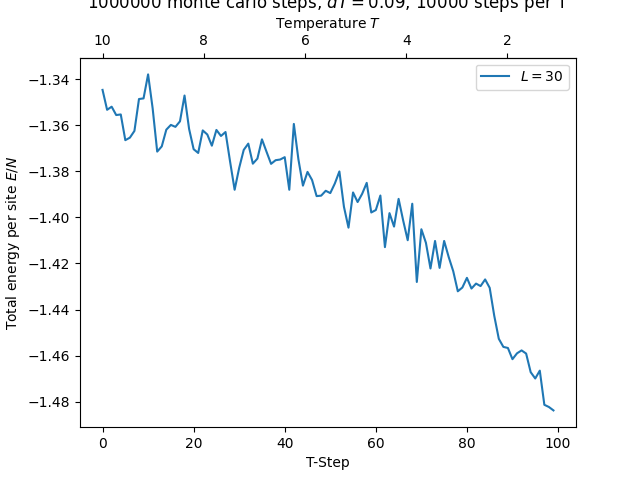

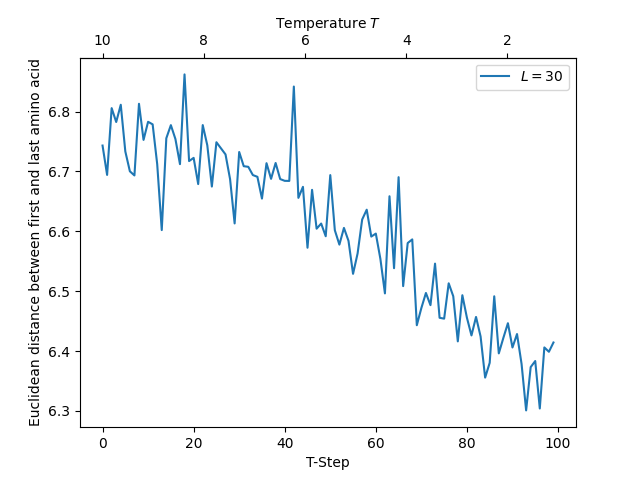

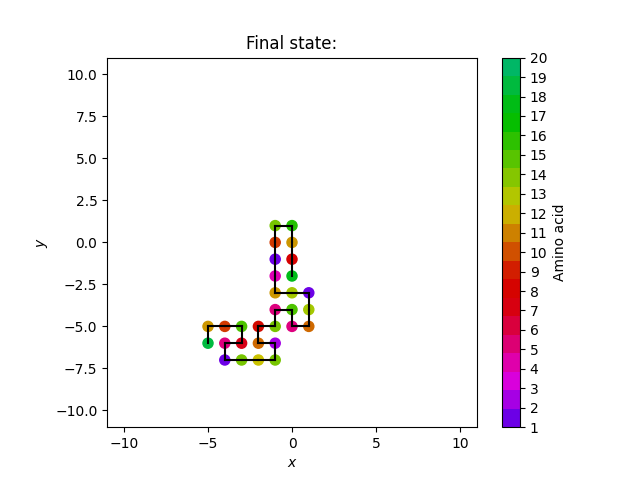

In [19]:
ergs, grid, coord_vec, fig, ax, ax2, geo_dist, fig_geo, ax_geo, ax2geo, figPrev, axPrev \
    = annealing.averaged_annealing(length=LEN_PROTEINS, T_steps=NUM_T_STEPS_ANNEALING, num_at_T=NUM_STEPS_AT_T_ANNEALING, T_i=INIT_TEMP_ANNEALING, T_f=FINAL_TEMP_ANNEALING, path="")
ax_geo.set_xscale("linear")
fig_geo.savefig(f'figures/ex5_dist.{FMT}', dpi = DPI, format = FMT)
axPrev.set_title("Initial state:")
figPrev.savefig(f'figures/ex5_protein_prev.{FMT}', dpi = DPI, format = FMT)
fig.savefig(f'figures/ex5_erg.{FMT}', dpi = DPI, format = FMT)
fig3, ax3 = randomwalk.plot_protein(coord_vec=coord_vec, dim=LEN_PROTEINS/3, path="")
ax3.set_title("Final state:")
fig3.savefig(f'figures/ex5_protein.{FMT}', dpi = DPI, format = FMT)

### Averaged:

1 / 20
2 / 20
3 / 20
4 / 20
5 / 20
6 / 20
7 / 20
8 / 20
9 / 20
10 / 20
11 / 20
12 / 20
13 / 20
14 / 20
15 / 20
16 / 20
17 / 20
18 / 20
19 / 20
20 / 20


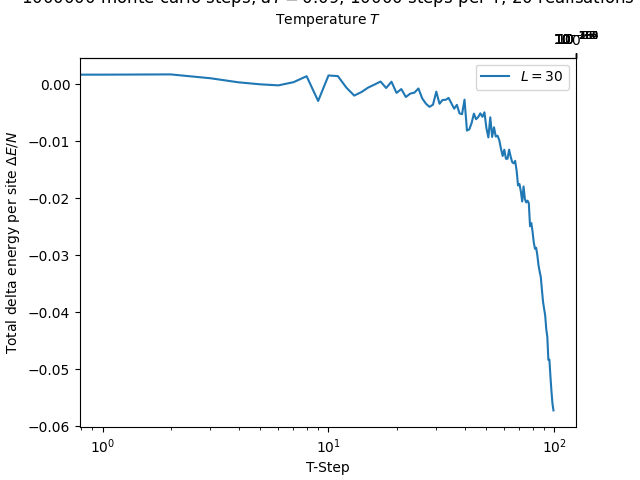

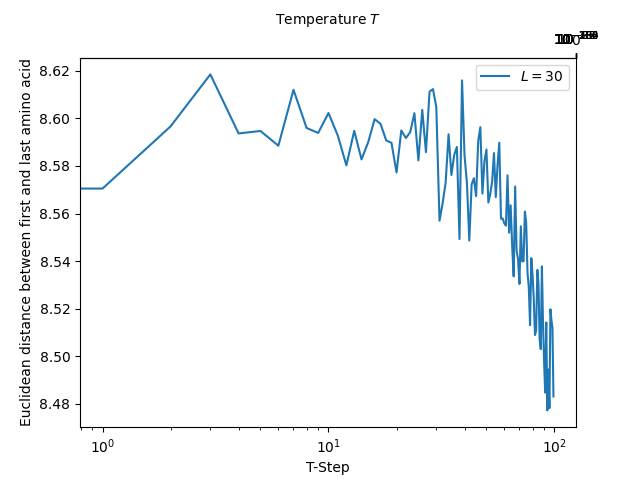

In [20]:
delta_ergs_avg, geo_dist_avg, fig, ax, ax2, fig_geo, ax_geo, ax_geo2 \
    = annealing.annealing_multiple_runs(length=LEN_PROTEINS, T_steps=NUM_T_STEPS_ANNEALING, num_at_T=NUM_STEPS_AT_T_ANNEALING, runs=RUNS_ANNEALING, T_i=INIT_TEMP_ANNEALING, T_f=FINAL_TEMP_ANNEALING, path="")

# Ex. 6:

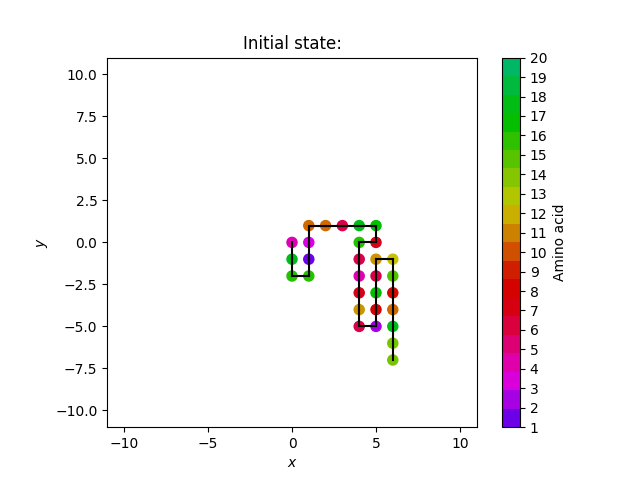

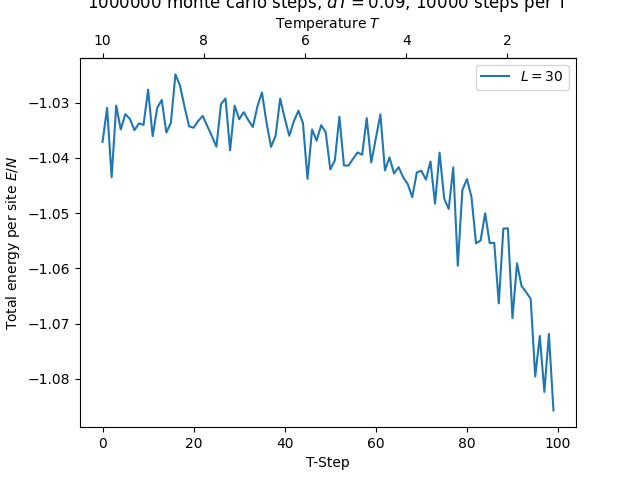

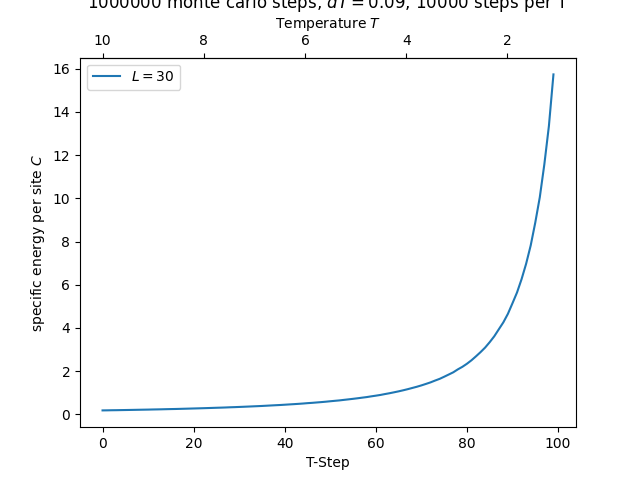

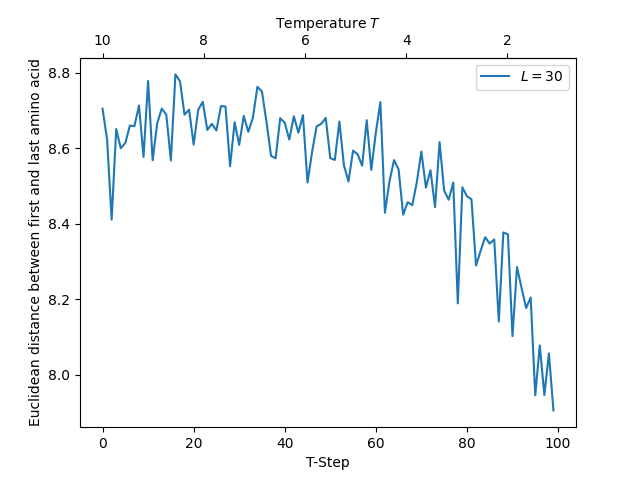

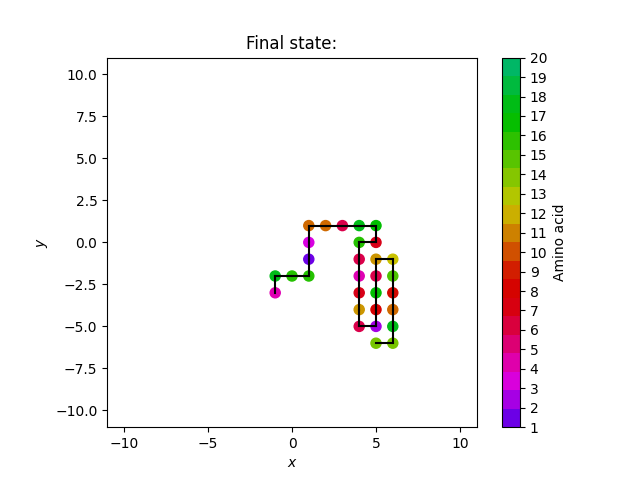

In [21]:
J = np.full((20,20), -3)

ergs, grid, coord_vec, fig, ax, ax2, figPrev, axPrev, figC, axC, ax3, fig_geo, ax_geo, ax2_geo \
    = interaction.given_interaction_matrix(length=LEN_PROTEINS, T_steps=NUM_T_STEPS_EX6, num_at_T=NUM_STEPS_AT_T_EX6, T_i=INIT_TEMP_ANNEALING, T_f=FINAL_TEMP_ANNEALING,J = J, path="")
fig_geo.savefig(f'figures/ex6_dist.{FMT}', dpi = DPI, format = FMT)
figC.savefig(f'figures/ex6_specheat.{FMT}', dpi = DPI, format = FMT)
axPrev.set_title("Initial state:")
figPrev.savefig(f'figures/ex6_protein_prev.{FMT}', dpi = DPI, format = FMT)
fig.savefig(f'figures/ex6_erg.{FMT}', dpi = DPI, format = FMT)
fig3, ax3 = randomwalk.plot_protein(coord_vec=coord_vec, dim=LEN_PROTEINS/3, path="")
ax3.set_title("Final state:")
fig3.savefig(f'figures/ex6_protein.{FMT}', dpi = DPI, format = FMT)

### Analytischer Ausdruck für C:


\begin{align}
    \frac{C}{N} &= \frac{1}{N}\frac{\langle (\Delta H)^2 \rangle}{T^2} = \frac{1}{N}\frac{\langle H^2 \rangle - \langle H \rangle^2}{T^2} \\ & \\
                & \overset{!}{=} \frac{1}{N} \frac{\varepsilon^2\langle n^2 \rangle - \varepsilon^2\langle n\rangle ^2}{T^2} \\ & \\
    \Rightarrow E^2 &= \langle H \rangle^2 = \varepsilon^2 \langle n \rangle^2 \\ 
    \Rightarrow E &= \langle H \rangle = \varepsilon \langle n \rangle
\end{align}

Intuitiv klar: Energie = Anzahl Beiträge * Beitrag

# 🔴add time to find metastable state!🔴
see barrier.barrier -> is implemented in this function.

[[ 3  3 -3  3 -3  3  3 -3 -3  3 -3 -3  3 -3  3 -3 -3 -3  3  3]
 [-3  3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3  3  3 -3  3  3  3  3]
 [-3 -3  3 -3 -3 -3  3 -3  3  3  3  3  3 -3  3  3  3  3  3 -3]
 [ 3 -3  3  3 -3 -3 -3  3  3  3 -3 -3 -3 -3  3  3 -3  3 -3 -3]
 [-3  3  3  3 -3  3 -3  3  3 -3 -3 -3  3 -3  3  3 -3 -3 -3 -3]
 [ 3 -3 -3 -3  3 -3 -3 -3 -3 -3  3  3 -3  3  3  3 -3 -3 -3 -3]
 [-3  3  3 -3  3 -3  3  3 -3 -3 -3 -3 -3  3 -3 -3  3  3  3 -3]
 [ 3  3 -3 -3  3 -3 -3  3 -3  3 -3 -3 -3  3  3 -3 -3  3  3 -3]
 [ 3 -3  3 -3 -3 -3  3 -3 -3  3  3 -3 -3 -3 -3  3 -3  3  3  3]
 [ 3  3  3  3 -3  3 -3  3  3 -3  3  3  3 -3  3  3 -3  3  3  3]
 [ 3 -3  3  3  3 -3 -3 -3  3 -3  3  3  3  3 -3  3  3  3  3 -3]
 [-3 -3  3 -3  3 -3 -3 -3 -3  3  3 -3 -3  3  3  3 -3 -3  3 -3]
 [ 3 -3  3  3  3  3 -3 -3 -3 -3 -3  3  3 -3  3 -3 -3 -3  3 -3]
 [ 3 -3 -3  3 -3  3 -3 -3 -3 -3 -3  3 -3  3  3  3  3  3  3 -3]
 [ 3 -3 -3  3 -3  3 -3 -3  3  3 -3 -3  3  3  3  3  3  3  3  3]
 [-3 -3 -3 -3 -3 -3 -3 -3 -3  3  3 -3  3  3  3 -3  3  3

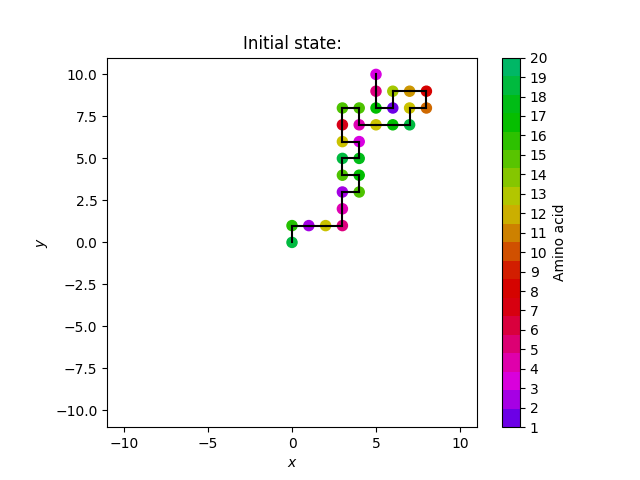

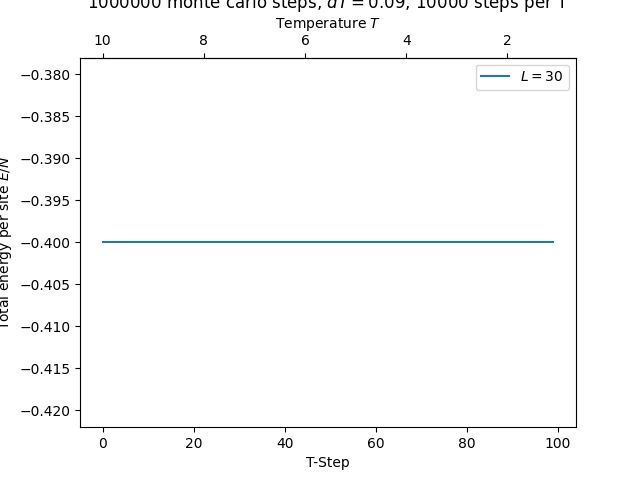

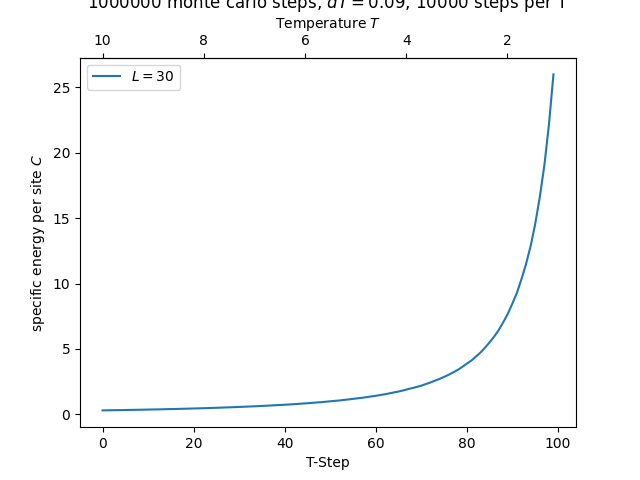

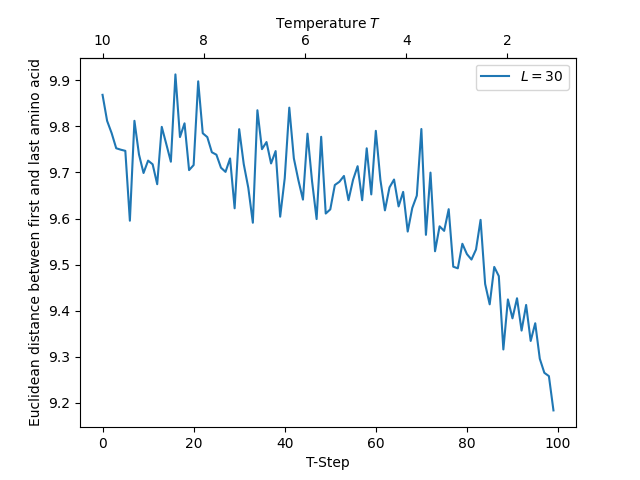

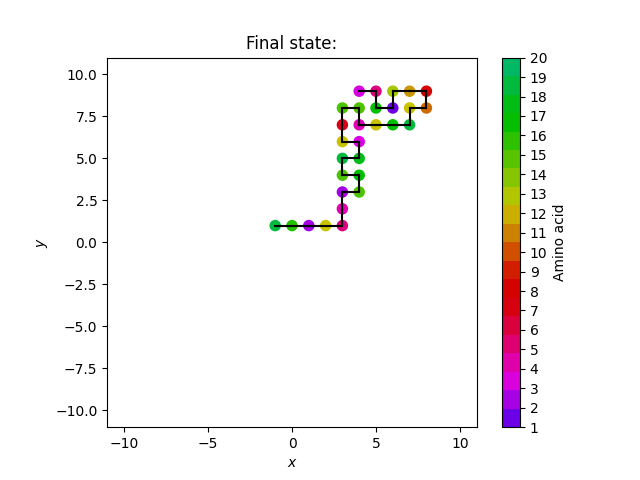

In [37]:
J = np.full((20,20), -3)

for i in range(0, 20):
    for j in range(0, 20):
        if rand() < 0.5:
            J[i][j] = J[i][j]*(-1)

#print(J)

ergs, grid, coord_vec, fig, ax, ax2, figPrev, axPrev, figC, axC, ax3, fig_geo, ax_geo, ax2_geo \
    = interaction.given_interaction_matrix(length=LEN_PROTEINS, T_steps=NUM_T_STEPS_EX6, num_at_T=NUM_STEPS_AT_T_EX6, T_i=INIT_TEMP_ANNEALING, T_f=FINAL_TEMP_ANNEALING,J = J, path="")
fig_geo.savefig(f'figures/ex6_dist.{FMT}', dpi = DPI, format = FMT)
figC.savefig(f'figures/ex6_specheat.{FMT}', dpi = DPI, format = FMT)
axPrev.set_title("Initial state:")
figPrev.savefig(f'figures/ex6_protein_prev.{FMT}', dpi = DPI, format = FMT)
fig.savefig(f'figures/ex6_erg.{FMT}', dpi = DPI, format = FMT)
fig3, ax3 = randomwalk.plot_protein(coord_vec=coord_vec, dim=LEN_PROTEINS/3, path="")
ax3.set_title("Final state:")
fig3.savefig(f'figures/ex6_protein.{FMT}', dpi = DPI, format = FMT)

# Conclusion:
- soos
